In [2]:
import numpy as np
import matplotlib.pyplot as plt
import librosa


In [34]:

def spectrogram(waveform, size_frame, size_shift):
  spectrogram = []
  hamming_window = np.hamming(size_frame)

  for i in np.arange(0, len(waveform) - size_frame, size_shift):
    idx = int(i)
    x_frame = waveform[idx: idx + size_frame]

    # 窓掛けしたデータをFFT
    fft_spec = np.fft.rfft(x_frame * hamming_window)

    # 振幅スペクトルを対数化
    fft_log_abs_spec = np.log(np.abs(fft_spec))

    # 配列に保存
    spectrogram.append(fft_log_abs_spec)
  return spectrogram

def dyhu(y, h, u):
  diff = y - np.matmul(h, u)
  distance = 0
  for row in diff:
    for v in row:
      distance += v ** 2
  return distance

def updated_h(y, h, u):
  return h * (np.matmul(y, u.T) / np.matmul(h, np.matmul(u, u.T)))
      
def updated_u(y, h, u):
  return u * (np.matmul(h.T, y) / np.matmul(h.T, np.matmul(h, u)))

def learn(y, init_h, init_u):
  h = init_h
  u = init_u
  diffs = []
  for i in range(100):
    h = updated_h(y, h, u)
    u = updated_u(y, h, u)
    diffs.append(dyhu(y, h, u))
  plt.show(diffs)
  return h, u

SR = 16000
SIZE_FRAME = 2048
SHIFT_SIZE = 16000 / 100  # 10 msec
# https://www.youtube.com/watch?v=Ci_zad39Uhw
x, _ = librosa.load('audio/shs-test-man.wav', sr=SR)

Y = spectrogram(x, SIZE_FRAME, SHIFT_SIZE)
Y = np.exp(Y)
Y = np.array(Y).T
K = 500
H = np.random.rand(len(Y), K)
U = np.random.rand(K, len(Y[0]))
learn(Y, H, U)

(array([[2.87951673e-06, 8.23051473e-05, 1.61830323e-05, ...,
         8.28407812e-05, 3.12741769e-05, 4.85202875e-06],
        [4.35495136e-06, 8.82719989e-06, 7.33463288e-06, ...,
         5.86611154e-06, 2.94681736e-05, 3.45270720e-05],
        [1.51081297e-04, 2.59240158e-06, 4.15956248e-05, ...,
         5.33222928e-05, 2.93677946e-04, 3.34268364e-05],
        ...,
        [1.47656268e-13, 2.48223533e-07, 4.28571742e-07, ...,
         4.64852290e-07, 2.72975660e-06, 3.87311505e-07],
        [1.32436173e-12, 7.14100941e-07, 1.17831336e-06, ...,
         7.28597561e-08, 1.35451791e-06, 5.50603746e-07],
        [6.36887111e-13, 8.63579242e-07, 6.27772878e-07, ...,
         1.44148070e-07, 1.99610332e-06, 3.53484041e-07]]),
 array([[1.12385694e-01, 4.87511674e-02, 6.43826109e-02, ...,
         9.20094968e-05, 1.62695504e-05, 3.13695961e-05],
        [6.15615084e-01, 6.29982077e-01, 1.55367297e-02, ...,
         3.72212047e-12, 4.04394812e-11, 1.69095240e-10],
        [1.80846753e-02, 

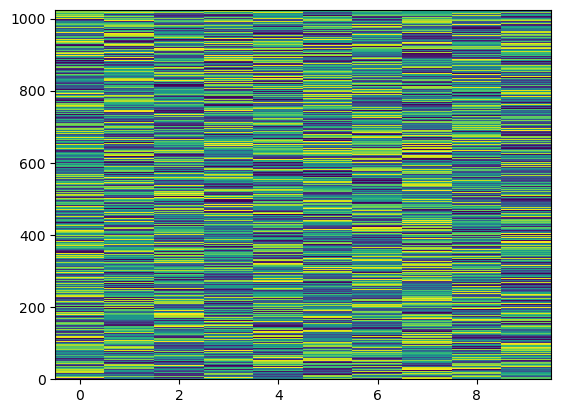

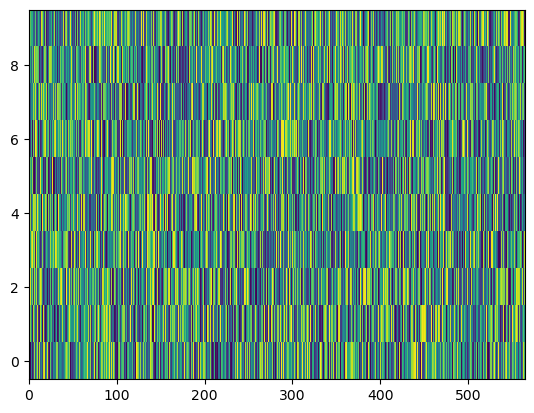

In [32]:

fig = plt.figure()
plt.imshow(H, aspect='auto', interpolation='nearest', origin='lower')
plt.show()
fig.savefig('')


plt.imshow(U, aspect='auto', interpolation='nearest', origin='lower')
plt.show()

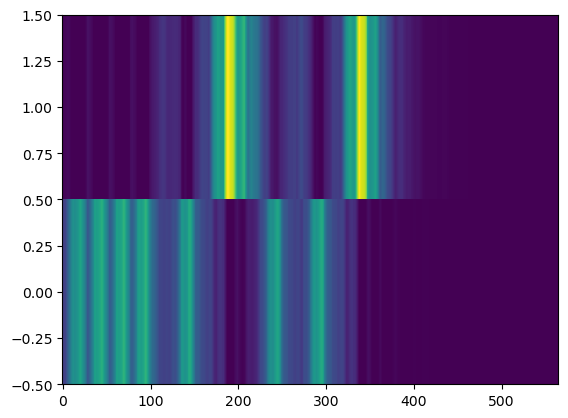

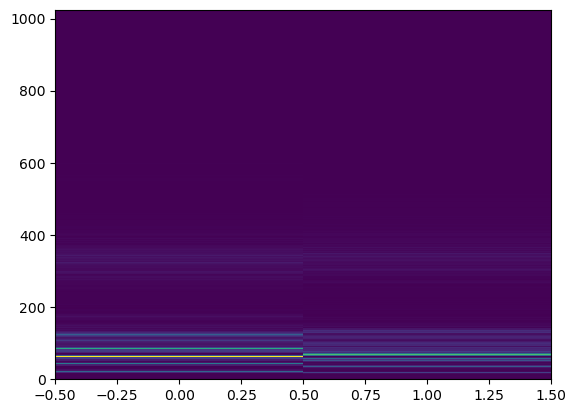

In [33]:
from sklearn.decomposition import NMF
model = NMF(n_components=2, init='random', random_state=0)
W = model.fit_transform(Y)
H = model.components_
plt.imshow(H, aspect='auto', interpolation='nearest', origin='lower')
plt.show()
plt.imshow(W, aspect='auto', interpolation='nearest', origin='lower')
plt.show()
